In [ ]:
# ! pip install python-doctr mplcursors matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#### Task 7: Determine the length of the agreement

In [ ]:
import os
import json
import pandas as pd

root_dir = 'drive/MyDrive/NLP/OCR_output'

data_entries = []

# looping through all files
for state_folder in os.listdir(root_dir):
  state_path = os.path.join(root_dir, state_folder)
  for filename in os.listdir(state_path):
    if filename.endswith('.json'):
        file_path = os.path.join(state_path, filename)

        with open(file_path, 'r', encoding='utf-8') as f:
            json_output = json.load(f)

        # counting number of pages
        num_pages = len(json_output['pages'])

        # counting number of words
        total_words = 0
        for page in json_output['pages']:
            for block in page['blocks']:
                for line in block['lines']:
                    total_words += len(line['words'])

        # creating dataframe
        data_entries.append({
            'State': state_folder,
            'Filename': filename,
            'Num_Pages': num_pages,
            'Total_Words': total_words
        })

df = pd.DataFrame(data_entries)

df.to_csv('drive/MyDrive/NLP/Agreements_metadata.csv', index=False)

#### dataset plots

/tmp/ipython-input-1815301108.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


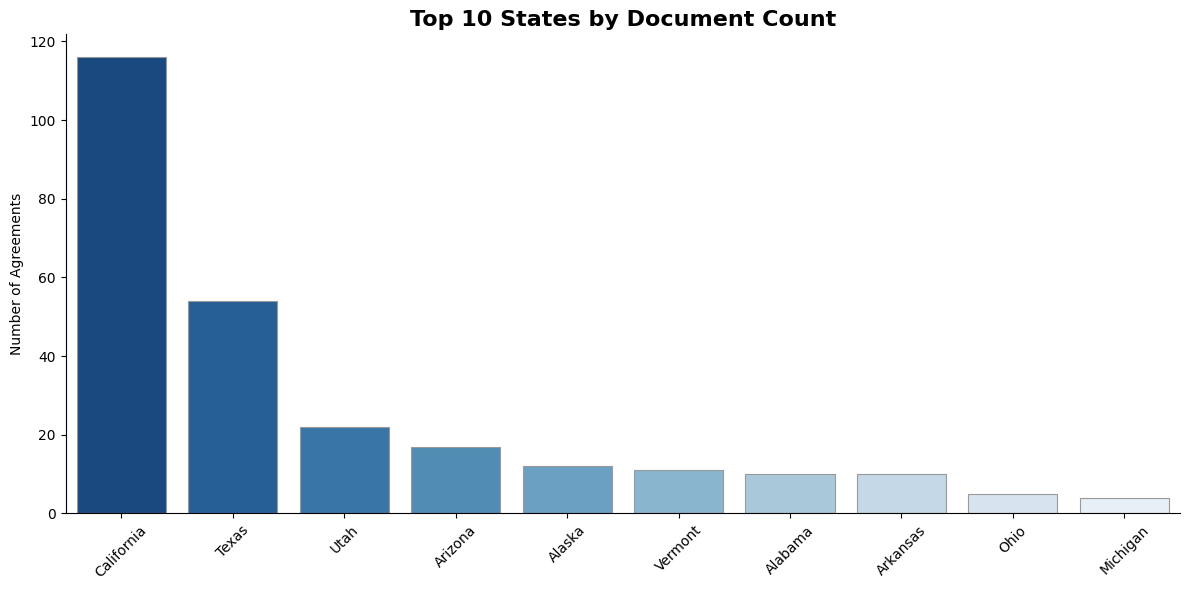

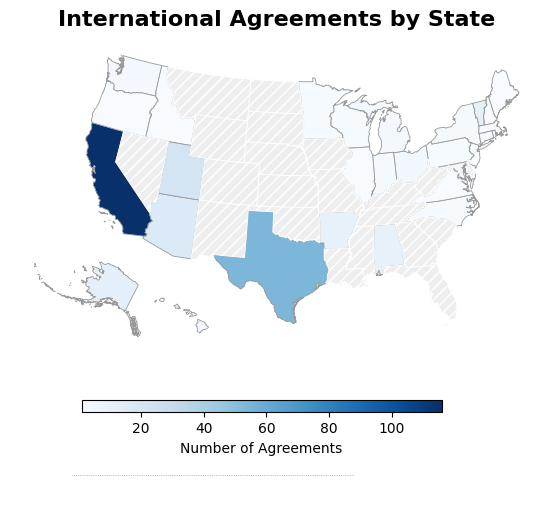

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('drive/MyDrive/NLP/Agreements_metadata.csv')

top_10_states = df['State'].value_counts().nlargest(10).index
df_top10 = df[df['State'].isin(top_10_states)]

plt.figure(figsize=(12, 6))

sns.countplot(
    data=df_top10,
    x='State',
    order=top_10_states,
    palette='Blues_r',
    edgecolor='0.6',
    linewidth=0.8
)

plt.title('Top 10 States by Document Count', fontdict={'fontsize': 16, 'fontweight': 'bold'})

plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Number of Agreements')
sns.despine()

plt.tight_layout()
plt.savefig('drive/MyDrive/NLP/plots/states_doc_count_barplot.png', bbox_inches='tight')
plt.show()

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Doc_Count']

# map data
shapefile_url = "https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_5m.zip"
gdf = gpd.read_file(shapefile_url)

gdf = gdf.to_crs("EPSG:5070")
lower48 = gdf[~gdf['STATEFP'].isin(['02', '15', '60', '66', '69', '72', '78'])].copy()
alaska = gdf[gdf['STATEFP'] == '02'].copy()
hawaii = gdf[gdf['STATEFP'] == '15'].copy()

alaska.geometry = alaska.geometry.scale(xfact=0.35, yfact=0.35, origin=(0,0))
alaska.geometry = alaska.geometry.translate(xoff=-1000000, yoff=-1200000)
hawaii.geometry = hawaii.geometry.rotate(35)
hawaii.geometry = hawaii.geometry.translate(xoff=4800000, yoff=-1400000)

usa_gdf = pd.concat([lower48, alaska, hawaii])

usa_plot = usa_gdf.merge(state_counts, left_on='NAME', right_on='State', how='left')

usa_plot['Doc_Count'] = usa_plot['Doc_Count'].replace(0, np.nan)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

cax = fig.add_axes([0.35, 0.25, 0.3, 0.02])

usa_plot.plot(
    column='Doc_Count',
    cmap='Blues',
    linewidth=0.6,
    edgecolor='0.6',
    ax=ax,
    cax=cax,
    legend=True,
    missing_kwds={
        "color": "#eeeeee",
        "edgecolor": "white",
        "hatch": "///",
        "label": "Zero Agreements"
    },
    legend_kwds={
        'label': "Number of Agreements",
        'orientation': "horizontal",
    }
)

ax.hlines(y=-1300000, xmin=-2500000, xmax=500000, color='grey', linestyle=':', linewidth=0.5)

ax.set_title('International Agreements by State', fontdict={'fontsize': 16, 'fontweight': 'bold'})
ax.axis('off')

plt.savefig('drive/MyDrive/NLP/plots/doc_counts_map_dense_tight.png', dpi=300, bbox_inches='tight')
plt.show()


#### Length plots

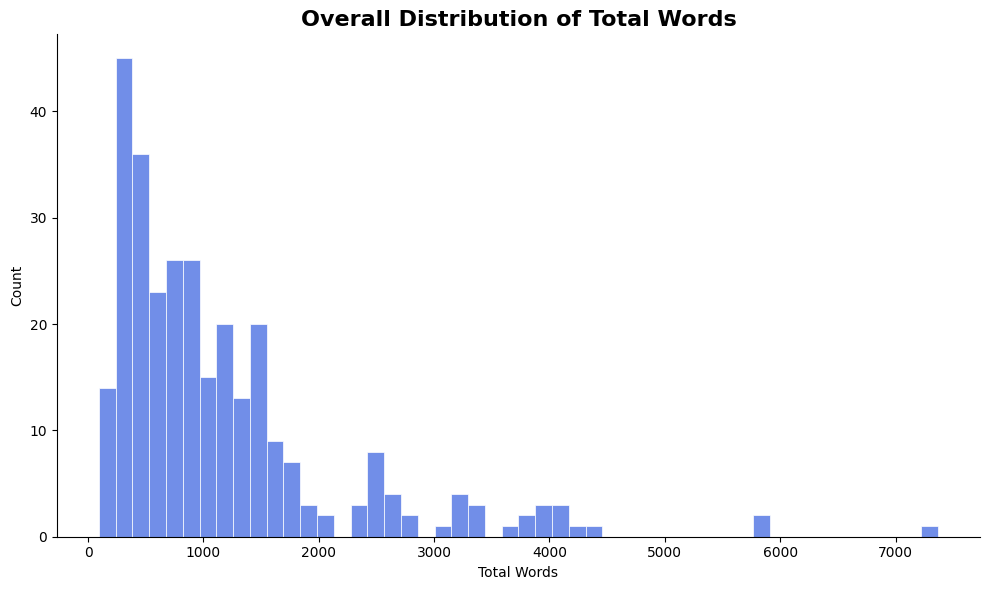

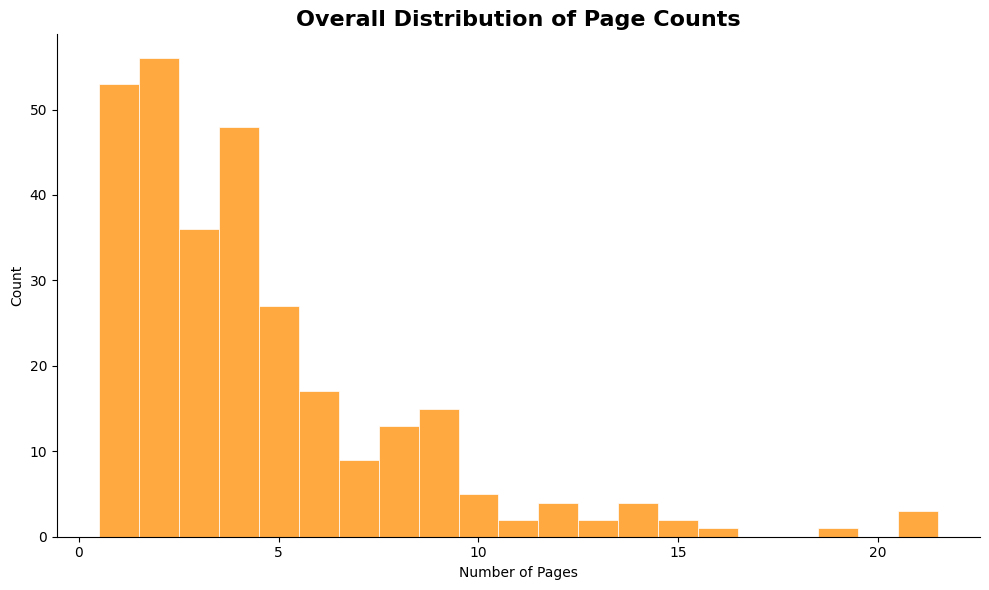

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.histplot(
    df['Total_Words'],
    bins=50,
    color='royalblue',
    edgecolor='white',
    linewidth=0.5
)

plt.title('Overall Distribution of Total Words', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Total Words')
plt.ylabel('Count')
sns.despine()

plt.tight_layout()
plt.savefig('drive/MyDrive/NLP/plots/words_distribution_barplot.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))

sns.histplot(
    df['Num_Pages'],
    bins=30,
    color='darkorange',
    discrete=True,
    edgecolor='white',
    linewidth=0.5
)

plt.title('Overall Distribution of Page Counts', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Number of Pages')
plt.ylabel('Count')
sns.despine()

plt.tight_layout()
plt.savefig('drive/MyDrive/NLP/plots/pages_distribution_barplot.png', bbox_inches='tight')
plt.show()

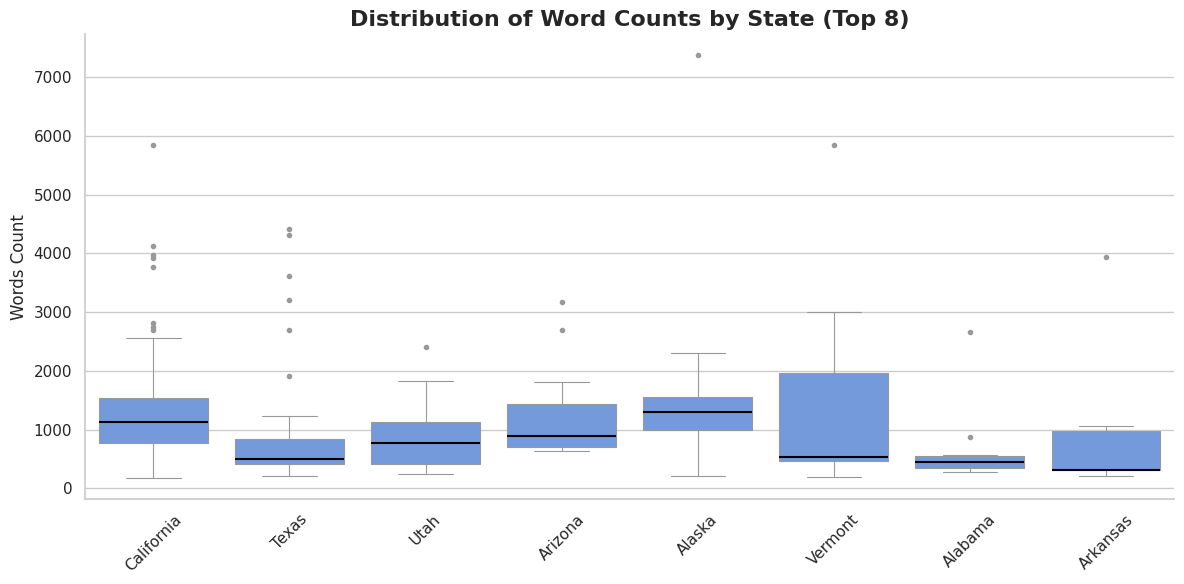

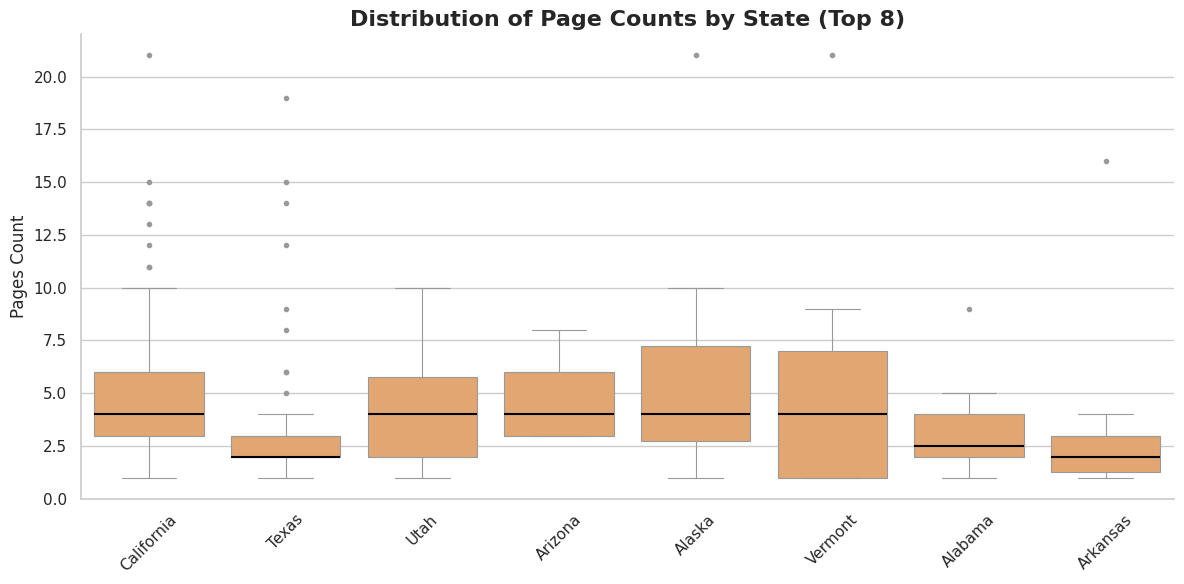

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('drive/MyDrive/NLP/Agreements_metadata.csv')

word_col = 'Total_Words'
page_col = 'Num_Pages'

top_8_states = df['State'].value_counts().nlargest(8).index
df_top8 = df[df['State'].isin(top_8_states)]

def create_styled_boxplot(data, x_col, y_col, order, title, filename):
    plt.figure(figsize=(12, 6))

    box_color = 'cornflowerblue' if y_col == word_col else 'sandybrown'

    sns.boxplot(
        data=data,
        x=x_col,
        y=y_col,
        order=order,
        color=box_color,
        linewidth=0.8,
        boxprops=dict(edgecolor='0.6'),
        whiskerprops=dict(color='0.6'),
        capprops=dict(color='0.6'),
        medianprops=dict(color='black', linewidth=1.5),
        flierprops=dict(marker='o', markerfacecolor='0.6', markeredgecolor='0.6', markersize=3)
    )

    plt.title(title, fontdict={'fontsize': 16, 'fontweight': 'bold'})
    plt.xticks(rotation=45)
    plt.xlabel('')
    plt.ylabel('Words Count' if y_col == word_col else 'Pages Count')

    sns.despine()

    plt.tight_layout()
    plt.savefig(f'drive/MyDrive/NLP/plots/{filename}', bbox_inches='tight')
    plt.show()

create_styled_boxplot(
    data=df_top8,
    x_col='State',
    y_col=word_col,
    order=top_8_states,
    title='Distribution of Word Counts by State (Top 8)',
    filename='states_word_count_boxplot_solid.png'
)

create_styled_boxplot(
    data=df_top8,
    x_col='State',
    y_col=page_col,
    order=top_8_states,
    title='Distribution of Page Counts by State (Top 8)',
    filename='states_page_count_boxplot_solid.png'
)

#### Task 9: Analysis of Frequency of Recurring Clauses

In [ ]:
# !pip install sentence-transformers hdbscan

In [ ]:
import numpy as np
from sentence_transformers import SentenceTransformer
import hdbscan

ROOT_DIR = 'drive/MyDrive/NLP/OCR_output'
MIN_WORDS_IN_CLAUSE = 10  # ignoring short lines (headers, page numbers)
MIN_CLUSTER_SIZE = 2      # a clause must appear in at least 2 docs to be a "cluster"

documents_data = []
corpus_sentences = []

for state_folder in os.listdir(ROOT_DIR):
  state_path = os.path.join(ROOT_DIR, state_folder)

  for filename in os.listdir(state_path):
    if not filename.endswith('.json'): continue

    file_path = os.path.join(state_path, filename)

    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    # iterate through blocks (paragraphs)
    for page_num, page in enumerate(data['pages']):
        for block in page['blocks']:

            # reconstruct text from the block
            lines_text = []
            for line in block['lines']:
                words = [w['value'] for w in line['words']]
                lines_text.append(" ".join(words))

            block_text = " ".join(lines_text).strip()

            if len(block_text.split()) >= MIN_WORDS_IN_CLAUSE:
                corpus_sentences.append(block_text)
                documents_data.append({
                    'State': state_folder,
                    'Filename': filename,
                    'Page': page_num + 1,
                    'Text': block_text
                })

model = SentenceTransformer('all-MiniLM-L6-v2') # fast, lightweight model
embeddings = model.encode(corpus_sentences, show_progress_bar=True)

clusterer = hdbscan.HDBSCAN(
    min_cluster_size=MIN_CLUSTER_SIZE,
    min_samples=1,
    metric='euclidean'
)
cluster_labels = clusterer.fit_predict(embeddings)

df = pd.DataFrame(documents_data)
df['Cluster_ID'] = cluster_labels

cluster_counts = df['Cluster_ID'].value_counts()

def classify_frequency(cluster_id, count):
    if cluster_id == -1:
        return "Rarely"
    elif count > 10:
        return "More than 10 times"
    elif count > 5:
        return "More than 5 times"
    else:
        return "More than once"

df['Frequency_Label'] = df.apply(
    lambda x: classify_frequency(x['Cluster_ID'], cluster_counts[x['Cluster_ID']]),
    axis=1
)

df.sort_values(by='Cluster_ID', inplace=True)

df.to_csv('drive/MyDrive/NLP/clause_analysis.csv', index=False)


plots

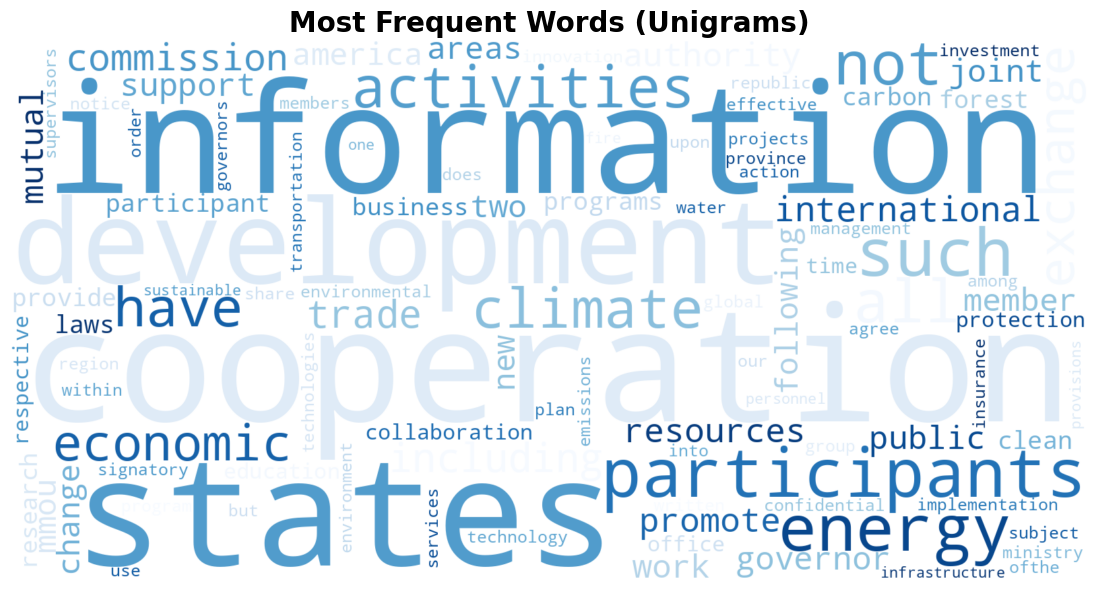

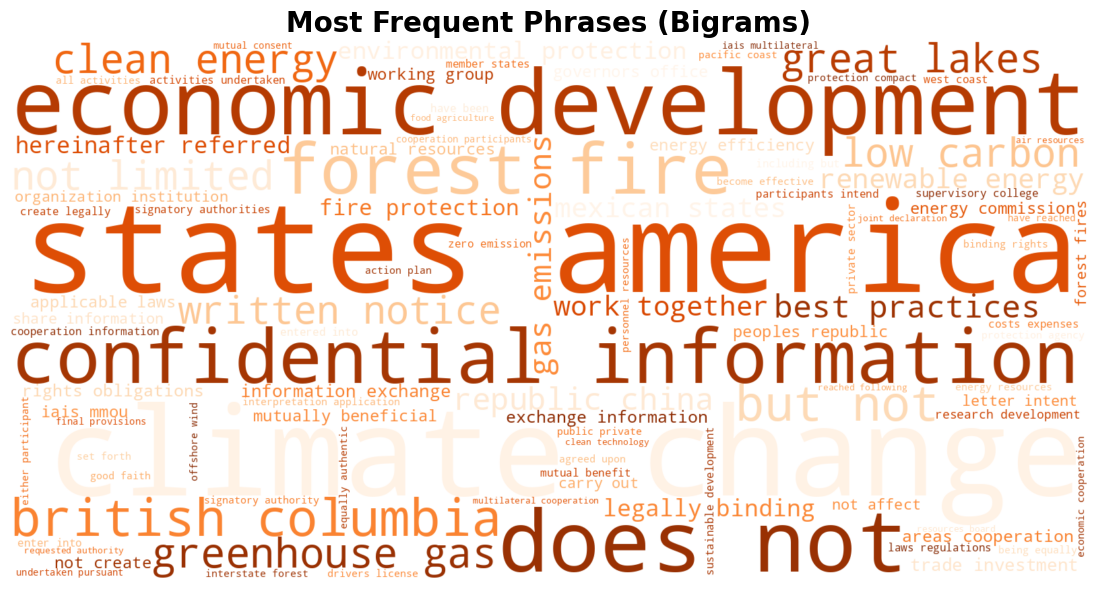

In [ ]:
import os
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re

root_dir = 'drive/MyDrive/NLP/OCR_output'

# Extended Stop Words (including OCR noise & legal boilerplate)
stop_words = set([
    'the', 'and', 'of', 'to', 'in', 'a', 'for', 'that', 'on', 'is', 'with', 'as',
    'by', 'be', 'it', 'or', 'are', 'this', 'from', 'at', 'an', 'which', 'will',
    'shall', 'agreement', 'page', 'section', 'memorandum', 'understanding',
    'date', 'signed', 'parties', 'party', 'state', 'government', 'article',
    'whereas', 'hereby', 'term', 'purpose', 'title', 'department', 'pdf', 'ocr',
    'contents', 'table', 'signature', 'witness', 'year', 'day', 'month',
    'any', 'other', "and", "with", "it", "is", "are", "the", "a", "an", "of", "in", "on",
    "for", "to", "by", "at", "from", "as", "that", "this", "be", "or", "which",
    "both", "their", "from", "your", 'i', 'will', 'e', 's', 'de', 'r', 'à',
    "and", "with", "it", "is", "are", "the", "a", "an", "of", "in", "on",
    "for", "to", "by", "at", "from", "as", "that", "this", "be", "or", "which",
    "both", "their", "from", "your", 'i', 'will', 'e', 's', 'de', 'r', 'à', 'y', 'shall',
    'missouri', 'alaska', 'new hampshire', 'illinois', 'virginia', 'washington', 'vermont', 'south dakota', 'georgia', 'connecticut', 'alabama',
    'oklahoma', 'colorado', 'ohio', 'maine', 'mississippi', 'utah', 'south carolina', 'any',
    'delaware', 'indiana', 'arkansas', 'iowa', 'new jersey', 'wisconsin', 'michigan', 'arizona',
    'massachusetts', 'montana', 'new york', 'wyoming', 'minnesota', 'west virginia', 'north dakota', 'florida', 'kentucky', 'louisiana', 'maryland', 'texas', 'hawaii', 'rhode island',
    'kansas', 'pennsylvania', 'north carolina', 'nebraska', 'tennessee', 'idaho', 'oregon', 'nevada', 'california', 'new mexico', "does not",
    "is not", "will not","can not","but not","any other","states america","united states",
    'has', 'through', 'between', 'may', 'its', 'mou', 'under', 'each', 'united'
])

unigram_counter = Counter()
bigram_counter = Counter()

for state_folder in os.listdir(root_dir):
    state_path = os.path.join(root_dir, state_folder)

    if not os.path.isdir(state_path):
        continue

    for filename in os.listdir(state_path):
        if filename.endswith('.json'):
            file_path = os.path.join(state_path, filename)

            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    json_output = json.load(f)

                # extract cleaned words for this specific file
                file_words = []
                for page in json_output.get('pages', []):
                    for block in page.get('blocks', []):
                        for line in block.get('lines', []):
                            for word_obj in line.get('words', []):

                                if isinstance(word_obj, dict):
                                    text = word_obj.get('text') or word_obj.get('value') or ""
                                elif isinstance(word_obj, str):
                                    text = word_obj
                                else:
                                    text = ""

                                # keeping only letters, remove short words & stop words
                                clean_text = re.sub(r'[^a-zA-Z]', '', text).lower()
                                if clean_text and len(clean_text) > 2 and clean_text not in stop_words:
                                    file_words.append(clean_text)

                unigram_counter.update(file_words)

                if len(file_words) > 1:
                    bigrams = [f"{w1} {w2}" for w1, w2 in zip(file_words, file_words[1:])]
                    bigram_counter.update(bigrams)

            except Exception as e:
                pass

def plot_cloud(counter, title, filename, cmap='Blues'):
    if not counter:
        print(f"No data for {title}")
        return


    wordcloud = WordCloud(
        width=1600,
        height=800,
        background_color='white',
        colormap=cmap,
        contour_width=0,
        max_words=100,
        prefer_horizontal=0.9
    ).generate_from_frequencies(counter)

    plt.figure(figsize=(14, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20, fontweight='bold')

    plt.savefig(f'drive/MyDrive/NLP/plots/{filename}', bbox_inches='tight')
    plt.show()

plot_cloud(unigram_counter, 'Most Frequent Words (Unigrams)', 'wordcloud_unigrams.png', cmap='Blues')

plot_cloud(bigram_counter, 'Most Frequent Phrases (Bigrams)', 'wordcloud_bigrams.png', cmap='Oranges')



/tmp/ipython-input-2380322601.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


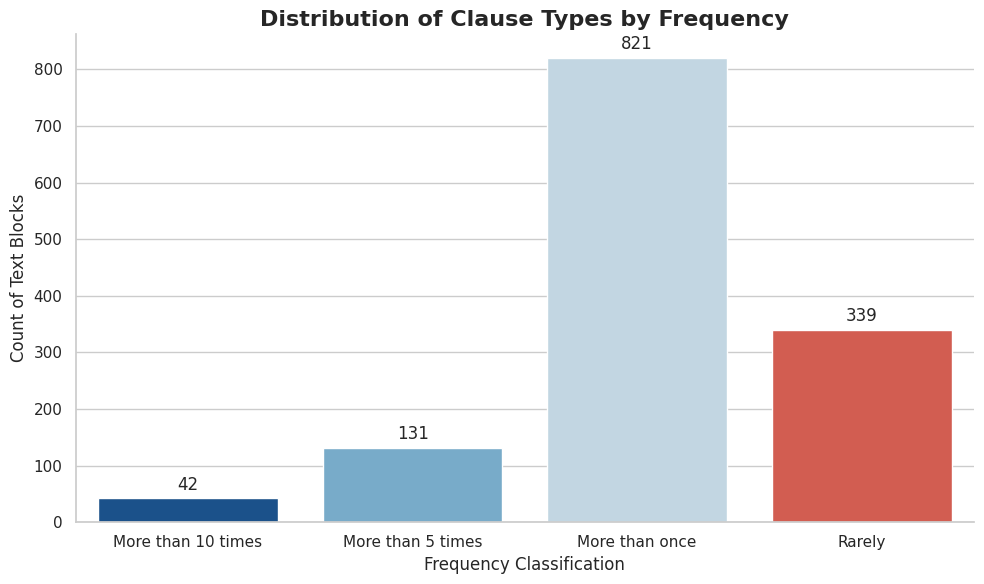

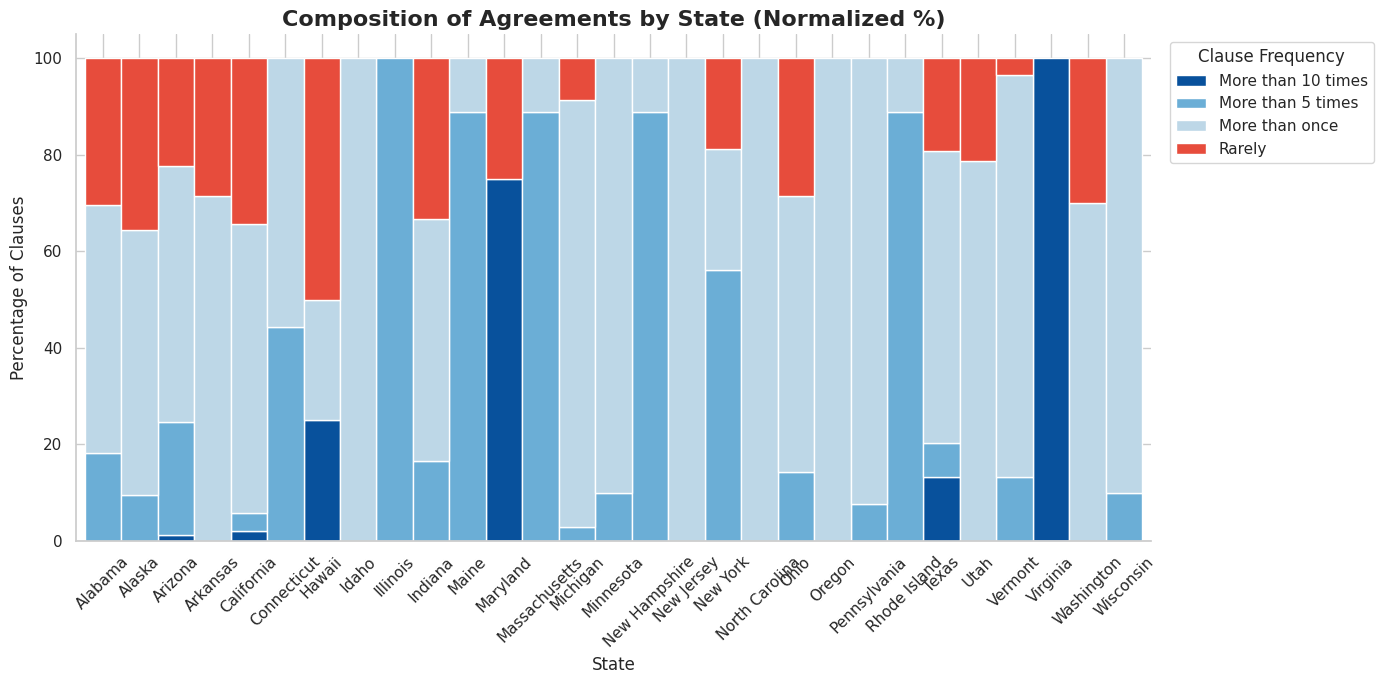

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('drive/MyDrive/NLP/clause_analysis.csv')

cluster_counts = df['Cluster_ID'].value_counts()

def classify_frequency(cluster_id, count):
    if cluster_id == -1:
        return "Rarely"
    elif count > 10:
        return "More than 10 times"
    elif count > 5:
        return "More than 5 times"
    else:
        return "More than once"

df['Frequency_Label'] = df.apply(
    lambda x: classify_frequency(x['Cluster_ID'], cluster_counts[x['Cluster_ID']]),
    axis=1
)


order = ["More than 10 times", "More than 5 times", "More than once", "Rarely"]
custom_palette = {
    "More than 10 times": "#08519c",
    "More than 5 times": "#6baed6",
    "More than once": "#bdd7e7",
    "Rarely": "#e74c3c"
}

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(
    data=df,
    x='Frequency_Label',
    order=order,
    palette=custom_palette,
    ax=ax
)

ax.set_title('Distribution of Clause Types by Frequency', fontdict={'fontsize': 16, 'fontweight': 'bold'})
ax.set_xlabel('Frequency Classification')
ax.set_ylabel('Count of Text Blocks')

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points')

sns.despine(ax=ax)
plt.tight_layout()
plt.savefig('drive/MyDrive/NLP/plots/clause_distribution_granular.png', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize=(14, 7))
ct = pd.crosstab(df['State'], df['Frequency_Label'])

for col in order:
    if col not in ct.columns:
        ct[col] = 0

ct_norm = ct.div(ct.sum(1), axis=0) * 100
ct_norm = ct_norm.reindex(columns=order).fillna(0)

ct_norm.plot(
    kind='bar',
    stacked=True,
    color=[custom_palette[x] for x in order],
    width=1,
    ax=ax
)

ax.set_title('Composition of Agreements by State (Normalized %)', fontdict={'fontsize': 16, 'fontweight': 'bold'})
ax.set_xlabel('State')
ax.set_ylabel('Percentage of Clauses')
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title='Clause Frequency')

plt.xticks(rotation=45)
sns.despine(ax=ax)

plt.tight_layout()
plt.savefig('drive/MyDrive/NLP/plots/state_clause_composition_granular.png', bbox_inches='tight')
plt.show()

Task 1: Identification of Areas of Cooperation

In [ ]:
# !pip install transformers torch

In [ ]:
import os
import json
import pandas as pd
from transformers import pipeline

ROOT_DIR = 'drive/MyDrive/NLP/OCR_output'

CANDIDATE_LABELS = [
    "Culture & Arts",
    "Education & Students",
    "Trade & Economic Development",
    "Environment & Green Energy",
    "Tourism",
    "Infrastructure & Transport",
    "Technology & Innovation",
    "Public Health",
    "Friendship & Goodwill"
]

classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

results = []

for state_folder in os.listdir(ROOT_DIR):
    state_path = os.path.join(ROOT_DIR, state_folder)
    if not os.path.isdir(state_path): continue

    for filename in os.listdir(state_path):
        if not filename.endswith('.json'): continue

        file_path = os.path.join(state_path, filename)

        try:
            # load OCR Data
            with open(file_path, 'r', encoding='utf-8') as f:
                data = json.load(f)

            full_text_list = []
            for page in data['pages']:
                for block in page['blocks']:
                    for line in block['lines']:
                        words = [w['value'] for w in line['words']]
                        full_text_list.append(" ".join(words))

            full_text = " ".join(full_text_list)

            truncated_text = full_text[:3000]

            prediction = classifier(truncated_text, CANDIDATE_LABELS, multi_label=True)

            scores = dict(zip(prediction['labels'], prediction['scores']))

            # only keeping topics with > 50% confidence
            active_topics = [label for label, score in scores.items() if score > 0.5]

            # if nothing scored high, grabing the top 1
            if not active_topics:
                active_topics = [prediction['labels'][0]]

            results.append({
                'State': state_folder,
                'Filename': filename,
                'Detected_Topics': ", ".join(active_topics),
                'Top_Topic': prediction['labels'][0],
                'Top_Score': round(prediction['scores'][0], 3)
            })

            print(f"Processed {filename}: {active_topics}")

            df = pd.DataFrame(results)

            output_file = 'drive/MyDrive/NLP/cooperation_areas.csv'
            df.to_csv(output_file, index=False)

        except Exception as e:
            print(f"Error processing {filename}: {e}")

df = pd.DataFrame(results)

output_file = 'drive/MyDrive/NLP/cooperation_areas.csv'
df.to_csv(output_file, index=False)

# 6m50s runtime

#### plots

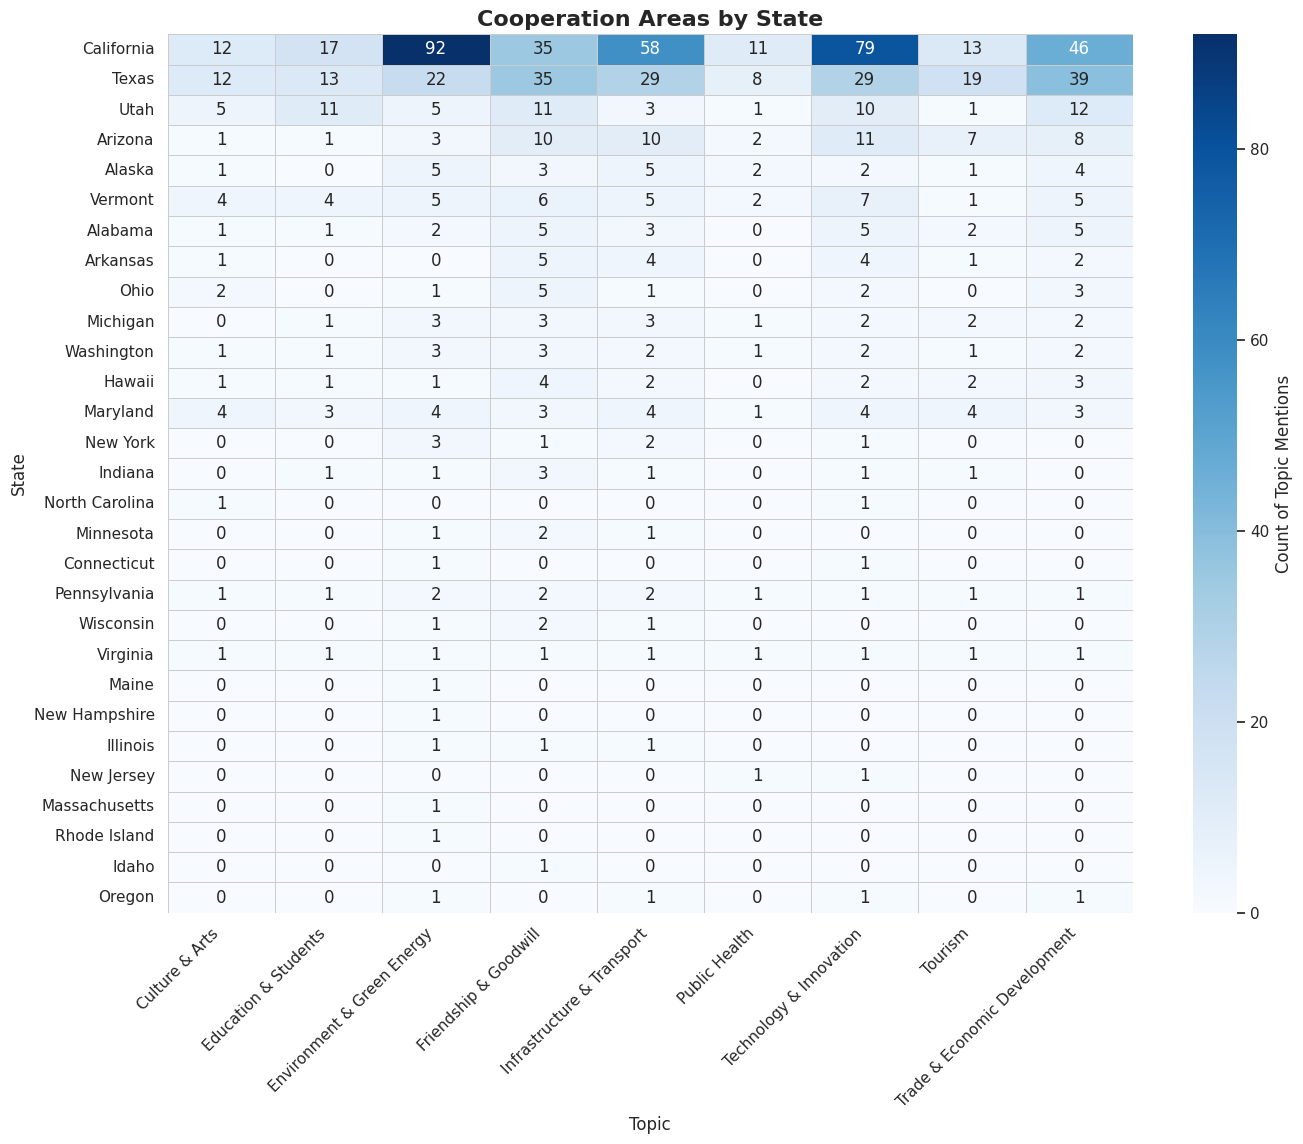

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('drive/MyDrive/NLP/cooperation_areas.csv')

df['Topic_List'] = df['Detected_Topics'].str.split(', ')
df_exploded = df.explode('Topic_List')
df_exploded.rename(columns={'Topic_List': 'Topic'}, inplace=True)

state_order = df['State'].value_counts().sort_values(ascending=False).index
heatmap_data = pd.crosstab(df_exploded['State'], df_exploded['Topic'])

heatmap_data = heatmap_data.reindex(state_order)

plt.figure(figsize=(14, max(8, len(heatmap_data) * 0.4)))

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='d',
    cmap='Blues',
    linewidths=0.5,
    linecolor='0.8',
    cbar_kws={'label': 'Count of Topic Mentions'}
)

plt.title('Cooperation Areas by State', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Topic', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('drive/MyDrive/NLP/plots/topic_state_heatmap_sorted.png', bbox_inches='tight')
plt.show()

/tmp/ipython-input-1982781779.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


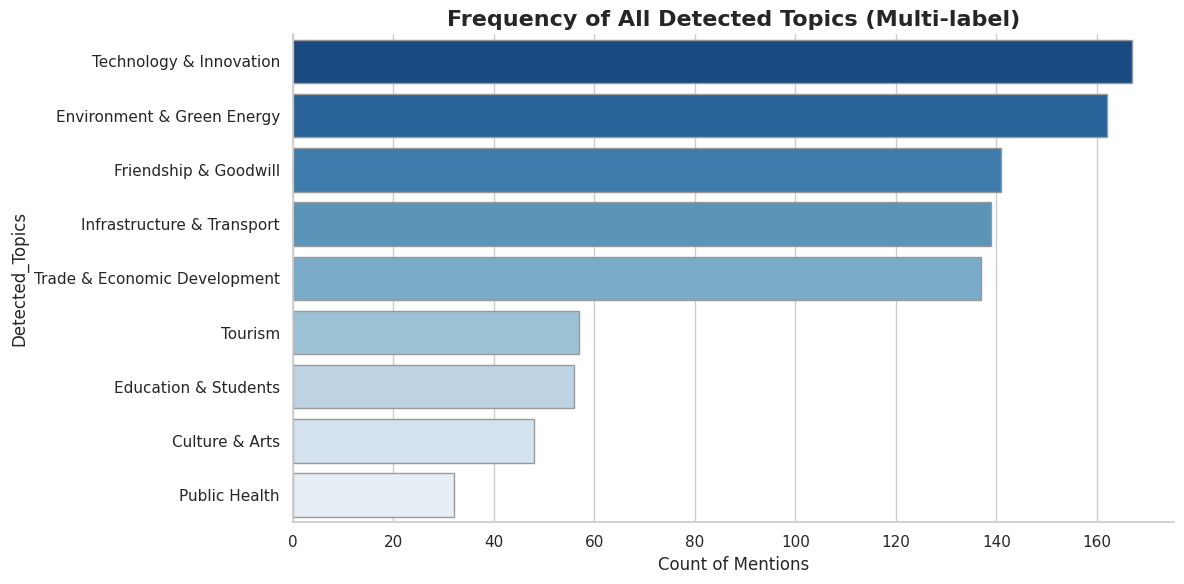

/tmp/ipython-input-1982781779.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


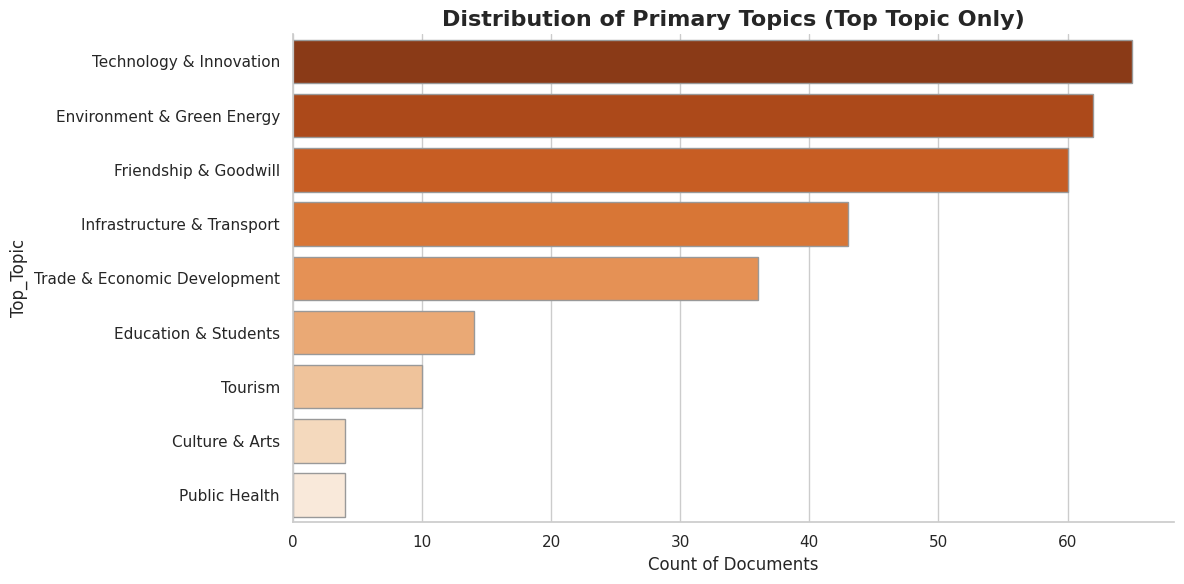

In [ ]:
all_topics_series = df['Detected_Topics'].str.split(', ').explode()
multi_topic_counts = all_topics_series.value_counts()

top_topic_counts = df['Top_Topic'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=multi_topic_counts.values,
    y=multi_topic_counts.index,
    palette='Blues_r',
    edgecolor='0.6'
)

plt.title('Frequency of All Detected Topics (Multi-label)', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Count of Mentions')
sns.despine()
plt.tight_layout()
plt.savefig('drive/MyDrive/NLP/plots/multilabel_topic_dist.png')
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_topic_counts.values,
    y=top_topic_counts.index,
    palette='Oranges_r',
    edgecolor='0.6'
)

plt.title('Distribution of Primary Topics (Top Topic Only)', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Count of Documents')
sns.despine()
plt.tight_layout()
plt.savefig('drive/MyDrive/NLP/plots/top_topic_dist.png')
plt.show()